# Kerasの概要
> Kerasは，Pythonで書かれた，TensorFlowまたはTheano上で実行可能な高水準の**ニューラルネットワークライブラリ**です． Kerasは，迅速な実験を可能にすることに重点を置いて開発されました． 可能な限り遅れなくアイデアから結果に進められることは，良い研究をする上で重要です．
>
>次のような場合で深層学習ライブラリが必要なら，Kerasを使用してください:
>
> - 容易に素早くプロトタイプの作成が可能（ユーザーフレンドリー，モジュール性，および拡張性による）
> - CNNとRNNの両方，およびこれらの2つの組み合わせをサポート
> - CPUとGPU上でシームレスな動作

Keras Documentationより引用

**インストール方法**
```bash
pip install keras
```
**インポート方法**
```python
import keras
```



## Kerasの各種ドキュメント

 - [Keras: Pythonの深層学習ライブラリ - https://keras.io/ja/](https://keras.io/ja/)
 - [Kerasの実装例 - https://github.com/keras-team/keras/tree/master/examples](https://github.com/keras-team/keras/tree/master/examples)

---
# モデリング

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## データを用意

In [8]:
from keras.datasets import mnist
from keras.utils import np_utils

# Kerasに含まれるMNISTデータの取得
# 初回はダウンロードが発生するため時間がかかる
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
 
# 配列の整形と、色の範囲を0-255 -> 0-1に変換
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255
 
# 正解データを数値からダミー変数の形式に変換
# これは例えば0, 1, 2の3値の分類の正解ラベル5件のデータが以下のような配列になってるとして
#   [0, 1, 2, 1, 0]
# 以下のような形式に変換する
#   [[1, 0, 0],
#    [0, 1, 0],
#    [0, 0, 1],
#    [0, 1, 0],
#    [1, 0, 0]]
# 列方向が0, 1, 2、行方向が各データに対応し、元のデータで正解となる部分が1、それ以外が0となるように展開してる
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

## モデル設定

 1. `model = Sequential()`で初期化.
 2. `model.add()`で層を積んでいく.

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation


# ネットワークの定義
# 各層や活性関数に該当するレイヤを順に入れていく
# 作成したあとにmodel.add()で追加することも可能
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')
    ])

## モデルのコンパイル
```python
model.compile(loss="損失関数", optimizer="最適化関数")
```

In [11]:
# 損失関数、 最適化アルゴリズムなどを設定しモデルのコンパイルを行う
model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy']
)

## モデルの学習
```python
model.fit(
    X_train,  # 特徴量データ
    Y_train,  # 教師データ
    batch_size=200,  # 1つのミニバッチのデータ数
    epochs=20,  # 学習の繰り返し. N個のデータを何回学習するか
    validation_split=0.1  # 入力データの何割を検証用データにするか(各エポックのテスト)
    callbacks=[check]  # コールバック関数を指定
)
```

**コールバック関数**

Kerasには学習時に利用できるコールバック関数というものがあります。 コールバック関数を利用すると学習時にエポックごとなど適宜その関数が呼ばれることになるため、学習状況の監視やチェックポイントの作成などに役立ちます。

例 ) 早期終了を行うためのコールバック関数の設定は以下のようになります。
```python
from keras.callbacks import EarlyStopping
 
...
...
 
early_stopping = EarlyStopping(monitor='val_loss')
model.fit(
    X_train, y_train, 
    batch_size=200, 
    verbose=1, 
    epochs=20, 
    validation_split=0.1, 
    callbacks=[early_stopping])
```

In [13]:
from keras.callbacks import ModelCheckpoint


check = ModelCheckpoint("model.hdf5")

MINI_BATCH_SIZE = 200
EPOCHS = 20
VALIDATION_SPLIT = 0.1
callbacks_list = [
    check,
]

# 学習処理の実行
model.fit(
    X_train, y_train, 
    batch_size=MINI_BATCH_SIZE, 
    verbose=1, 
    epochs=EPOCHS, 
    validation_split=VALIDATION_SPLIT,
    callbacks=callbacks_list
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 60us/step - loss: 0.4524 - acc: 0.8809 - val_loss: 0.3751 - val_acc: 0.9077
Epoch 2/20
54000/54000 [==============================] - 4s 72us/step - loss: 0.4445 - acc: 0.8819 - val_loss: 0.3685 - val_acc: 0.9078
Epoch 3/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.4372 - acc: 0.8836 - val_loss: 0.3613 - val_acc: 0.9092
Epoch 4/20
54000/54000 [==============================] - 4s 65us/step - loss: 0.4306 - acc: 0.8836 - val_loss: 0.3557 - val_acc: 0.9100
Epoch 5/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.4246 - acc: 0.8853 - val_loss: 0.3499 - val_acc: 0.9095
Epoch 6/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.4191 - acc: 0.8858 - val_loss: 0.3453 - val_acc: 0.9102
Epoch 7/20
54000/54000 [==============================] - 4s 68us/step - loss: 0.4138 - acc: 0.8869 - val_loss: 0.3405 - val_acc:

## 予測

In [16]:
# 予測
pred = model.predict(X_test)
print(pred)

[[1.65042366e-04 2.83217059e-06 9.43930354e-05 ... 9.95475829e-01
  2.55696359e-05 3.01114493e-03]
 [2.00643912e-02 1.05723646e-03 7.88447201e-01 ... 1.64628739e-06
  1.29138213e-02 4.20704237e-06]
 [9.45803113e-05 9.58125472e-01 1.21648926e-02 ... 8.00932106e-03
  4.80091106e-03 1.84087304e-03]
 ...
 [1.17688751e-05 5.87388058e-05 1.32061265e-04 ... 4.53505013e-03
  2.31036451e-02 9.88734886e-02]
 [1.08677633e-02 1.01448335e-02 2.69526150e-03 ... 1.52515178e-03
  3.89797211e-01 2.27136561e-03]
 [1.27916632e-03 7.71623263e-08 2.73585739e-03 ... 5.14278611e-08
  3.21497137e-05 2.31314857e-06]]


## 評価

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("loss:{}\naccuracy:{}".format(loss, accuracy))

10000/10000 [==============================] - 1s 56us/step
loss:0.3452177201509476
accuracy:0.903


---
# ネットワークの可視化
> Kerasは作成したネットワークを可視化する機能も有してる。 

**インストール**
```bash
brew install graphviz
pip install pydot
```

**ネットワークを可視化した画像を保存**
```python
from keras.utils.visualize_util import plot
plot(model, to_file="ネットワークの可視化画像名.png", show_shapes=True, show_layer_names=True)
```

 - `to_file` : 出力の画像ファイル名
 - `show_shapes` : グラフ中に出力形状を書くか否や.(defaultはFalse)
 - `show_layer_names` : レイヤー名を書くか否や.(defaultはTrue)

**Jupyter notebook上のインラインに表示**

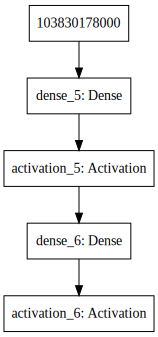

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
 
SVG(model_to_dot(model).create(prog='dot', format='svg'))

---
# 学習過程を可視化

In [26]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


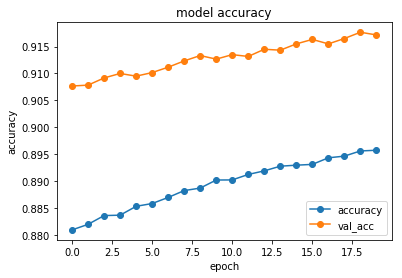

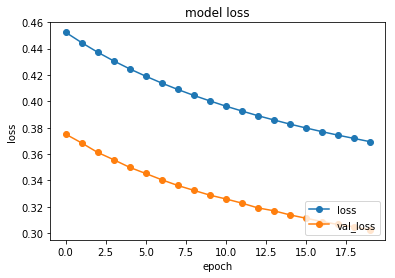

In [28]:
# modelに学習させた時の変化の様子をplot
plot_history(model.history)

---
# モデルの設定(記述)方法

Kerasでは、ネットワークを層(Layer)を記述する方法が2つある。

 - **`Sequential`モデル** : ネットワークを1列に積み重ねていく、シンプルな方法.
 - **`Functional API`** : 複雑なネットワークの記述が可能な方法. Sequentialモデルと異なり、複数の出力や共有レイヤーの定義等が可能.